# Overview of EDA/Viz implementation topics in MSDS593

In the visualization component taught by Yannet, you will learn a lot of high-level concepts, such as how to choose an appropriate visualization. In this component of the course, I will teach you how to write the code to implement visualizations. Further, we will learn a lot about how to manipulate, query, slice, and clean up data using `pandas` and `numpy`.

<img src="https://mlbook.explained.ai/images/tools/lab1.png" align="right" width="180">The notes we'll use are implemented as a live text / code entity called a notebook. In particular, I am running a [Jupyter Notebook](http://jupyterlab.readthedocs.io/en/latest/getting_started/overview.html) that I started by  typing `jupyter lab` from the command prompt in `Terminal` in the directory where I want to keep my notebook files, `.ipynb`. That command should bring up a browser window that looks something like the image to the right. Clicking on the “Python 3” icon under the “Notebook” category, will create and open a new notebook window.

During this course, some all of these notebooks will refer to data files on the web that you have to download or small data files in this course repository at `github.com`, which is where you are looking at this file from your browser. The data sits in the `data` subdirectory of the `notebooks` in the main directory of this repository. Click [here](https://github.com/parrt/msds593/tree/master/notebooks/data) to see the data files that we provide for you (versus data files we will ask you to download from another site, such as [kaggle.com](http://kaggle.com)).

## Quick demo launching jupyter lab

*Terence opens terminal, launches jupyter, and creates a notebook for in class work*

## Your responsibilities

There are a number of exercises interspersed throughout the lectures that we'll go through. At midnight California time the day after our lecture, you must submit a PDF "printed" from your notebook that contains all exercises.   It's unclear how much of each lecture and case study notebook we will get through for each 2 hour class session, so I will identify the exercise numbers you must submit for each lab. The lab assignments in canvas  are identified by the date of the lecture for your convenient.

The lecture notes are complete and available for you at any time on this public website so don't worry about frantically typing in everything and keeping up. However, as we go through, you are encouraged to try to follow along as I try things out. I will often give a few minutes for each exercise so that you can get at least a taste of what we are doing before we move on to the next piece of the lecture. Even if you don't finish during class, you must complete all exercises covered in the lecture as part of your submission by midnight the next day.

*Warning*: Please do not get so involved with doing exercises during class that you don't listen to the lecture! When I suggest our brief exercise period is over, we will go back to lecturing.

## Your resources

Other than these course notes and the [Python for Data Analysis: Data Wrangling with Pandas, NumPy, and IPython ](https://learning.oreilly.com/library/view/python-for-data/9781491957653/) book, there are lots of other free books via USF's online library. To get access, [start at USF](https://guides.usfca.edu/oreilly) and then you can jump to the various books.

I'm assuming you are aware of stackoverflow; e.g.,  here is a link to the over 166,000 [questions and answers about pandas](https://stackoverflow.com/questions/tagged/pandas).

You should also use the `#eda-viz-2020` slack channel to ask and answer questions with your classmates. Yannet, the TA, and I will also be available on that channel.

I do not have formal office hours as I simply try to make myself available when you need me. I am very often online so you can ping me directly on slack or email me.


## Overview of libraries

Just to give you a taste of what we're going to do in the class, here are some very quick samples of the three important libraries. My goal here is not to explain them in detail, but to show you a few of the interesting things we can do with the libraries.

### numpy

Pandas uses NumPy in its implementation so it makes sense to take a look at numpy first. Numpy is how we will do most of our numerical computing. It provides flexible implementations of vectors and matrices (`ndarray`) and fast operations and functions for linear algebra, random number generation, etc..

I always start with the following preamble in my notebooks or Python files:

In [3]:
import numpy as np
import pandas as pd

That allows us to refer to numpy package elements with the shorthand `np` and the shorthand for pandas as `pd`.

To give you a taste,  here's how we would create two vectors, add them together, and display the result:

In [4]:
a = np.array([1,2,3])
b = np.array([4,5,6])
print(" type:", type(a))
print("shape:", a.shape)
a + b   # or print(a + b)

 type: <class 'numpy.ndarray'>
shape: (3,)


array([5, 7, 9])

Here's a 2 x 3 matrix with random elements:

In [5]:
C = np.random.rand(2,3) # this is like a "list of lists" in Python
print(type(C))
print(C.shape)
print(C)

<class 'numpy.ndarray'>
(2, 3)
[[0.89832322 0.47568418 0.2240252 ]
 [0.61786225 0.00832558 0.89476709]]


And the following `@` operator does a matrix multiply $Ca$:

In [6]:
C @ a

array([2.52176718, 3.31881469])

which is the same thing as explicitly calling the dot product:

In [7]:
C.dot(a)

array([2.52176718, 3.31881469])

Notice that we didn't need any Python looping to implement matrix multiply ourselves.  All of this is built into numpy. This just scratches the surface but gives you a taste.

### pandas

Pandas is kind of like a table in the database or a spreadsheet that we can manipulate in Python. There are two fundamental entities:

* `DataFrame` is 2D tabular data structure; it has both rows and columns
* `Series` is a 1D array (colume) data structure

I think of series as the columns in the data frame, but they are really separate kinds of objects with different sets of functions that you can apply to them. Typically when you ask for a column from a data frame, you get a series object though.

Just as with a database or spreadsheet, we can perform queries, join dataframes, operate on columns, group rows, etc...

We will most often start by loading data from a comma separated value file (.csv) into a data frame using the pandas package object `pd`. For example, here's how to load a small data file describing, cars and their efficiency, into a data frame:

In [8]:
df_cars = pd.read_csv("data/cars.csv")
print(type(df_cars))
df_cars

<class 'pandas.core.frame.DataFrame'>


,MPG,CYL,ENG,WGT
0,18.0,8,307.0,3504
1,15.0,8,350.0,3693
2,18.0,8,318.0,3436
3,16.0,8,304.0,3433
4,17.0,8,302.0,3449
...,...,...,...,...
387,27.0,4,140.0,2790
388,44.0,4,97.0,2130
389,32.0,4,135.0,2295
390,28.0,4,120.0,2625


In [9]:
mpg = df_cars['MPG']   # Get a column
print(type(mpg))
print(mpg)

<class 'pandas.core.series.Series'>
0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: MPG, Length: 392, dtype: float64


We can get datatype information about the columns and summary statistics easily:

In [10]:
df_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     392 non-null    float64
 1   CYL     392 non-null    int64  
 2   ENG     392 non-null    float64
 3   WGT     392 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 12.4 KB


In [11]:
df_cars.describe()

,MPG,CYL,ENG,WGT
count,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,2977.584184
std,7.805007,1.705783,104.644004,849.402560
min,9.000000,3.000000,68.000000,1613.000000
25%,17.000000,4.000000,105.000000,2225.250000
50%,22.750000,4.000000,151.000000,2803.500000
75%,29.000000,8.000000,275.750000,3614.750000
max,46.599998,8.000000,455.000000,5140.000000


Instead of loading from a file, we can also create a data frame from a numpy array:

In [12]:
pd.DataFrame(np.random.rand(2,3), columns=['A','B','C'])

,A,B,C
0,0.179311,0.536875,0.982551
1,0.133495,0.612827,0.417409


### matplotlib 

Matplotlib is showing its age a little bit, but it's the most popular plotting library for Python. That means there is a huge amount of documentation and Q&A at stack overflow to help you solve problems.  I have found it frustrating to learn all of the quirks and details, but I can now bend it to my will.  There are newer libraries meant to be used in a browser that can do fun interactive stuff; see [plotly](https://plotly.com), for example.

This library focuses on flexibility, not so much ease of specification. I often have to write a great deal of Python code to tweak images to get what I want, but the results can be quite beautiful. For example, here is a 3D animation I built using a loop around a matplotlib plot:

<a href="http://explained.ai/regularization/images/lagrange-animation.gif"><img src="images/3D.png" width="250"></a>

The following images represent some of the basic 2D plots I've built with this library.  The most common plots I use are scatter, line, bar, bubble, and strip plots.

<table border="0">
<tr border="0">
        <td><img src="https://mlbook.explained.ai/images/first-taste/first-taste_go_5.svg" width="200">
        <td><img src="https://mlbook.explained.ai/images/bulldozer-feateng/bulldozer-feateng_eng_36.svg" width="200">
        <td><img src="https://mlbook.explained.ai/images/bulldozer-testing/bulldozer-testing_trend_1.svg" width="350">
</tr>

<tr border="0">
        <td><img src="images/bulldozer-topk-RF-Importance.png" width="200">
        <td><img src="images/bulldozer-YearMade-stratpd.png" width="200">
        <td><img src="https://github.com/parrt/dtreeviz/raw/master/testing/samples/regr-leaf.png" width="150">

</tr>

<tr border="0">
        <td><img src="https://mlbook.explained.ai/images/first-taste/first-taste_class_6.svg" width="200">
        <td><img src="https://mlbook.explained.ai/images/first-taste/first-taste_mnist_10.svg" width="200">
        <td><img src="https://mlbook.explained.ai/images/prep/prep_logs_2.svg" width="200">
</tr>

<tr border="0">
        <td><img src="https://mlbook.explained.ai/images/bulldozer-intro/bulldozer-intro_sniff_42.svg" width="300">
        <td><img src="https://user-images.githubusercontent.com/178777/49105085-9792c680-f234-11e8-8af5-bc2fde950ab1.png" width="200"> 
        <td><img src="https://mlbook.explained.ai/images/intro/mindist-decision-lines.svg" width="200">
</tr>

<tr border="0">
        <td colspan="2"><img src="https://explained.ai/decision-tree-viz/images/bubble.png" width="520">
        <td><img src="https://github.com/parrt/dtreeviz/raw/master/testing/samples/iris-TD-2.svg" width="250">

</tr>

<tr border="0">
        <td><img src="https://mlbook.explained.ai/images/first-taste/first-taste_mnist_3.svg" width="150">
        <td><img src="https://mlbook.explained.ai/images/first-taste/first-taste_mnist_6.svg" width="180">
</tr>

</table>

In [13]:
import matplotlib.pyplot as plt
#%config InlineBackend.figure_format = 'svg'   # svg vs png format make sharper images!
%config InlineBackend.figure_format = 'retina' # much faster than svg when generating lots of points

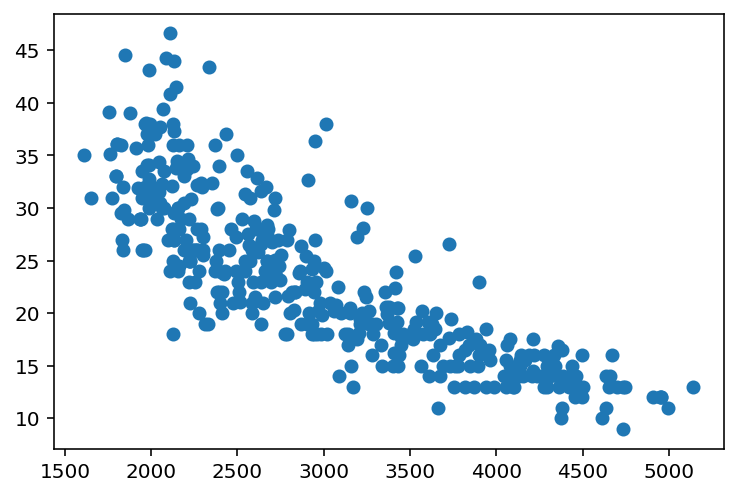

In [14]:
fig, ax = plt.subplots()  # make one subplot (ax) on the figure

ax.scatter(df_cars['WGT'], df_cars['MPG'])

plt.show() # not needed actually as plot shows up by default in notebook

Text(0.5, 1.0, 'Cars dataset, effect of weight on mpg')

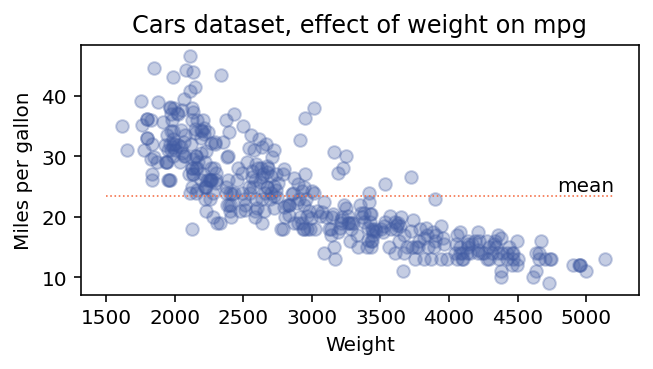

In [15]:
fig, ax = plt.subplots(figsize=(5,2.3))  # make one subplot (ax) on the figure

ax.scatter(df_cars['WGT'], df_cars['MPG'], c='#415BA3', alpha=.3, s=40)
m = df_cars['MPG'].mean()
ax.plot([1500,5200],[m,m], ':', linewidth=.8, c='#F46C43')
ax.text(5000,m*1.03, "mean", horizontalalignment='center')
ax.set_xlabel("Weight", fontsize=10)
ax.set_ylabel("Miles per gallon", fontsize=10)
ax.set_title("Cars dataset, effect of weight on mpg")

Ok, so that's a basic run through of the key players for the coding and implementation side of MSDS593.  Now, let's jump into the details!!!